In [0]:
#ci permette di importare qualsiasi modulo
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/TensorFlow 2.0/modules')
import pandas as pd
import tf_dataset_extractor as e
#import grapher_v1_1 as g
#import LSTM_creator_v1_0 as l
v = e.v
g = e.g
l = e.l

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# load dataset
v.upload.online_csv('/content/drive/My Drive/Colab Notebooks/TensorFlow 2.0/csv/GOOG.csv')
e.K = v.upload.make_backup()

In [17]:
#original copy without preprocessing
v.upload.retrieve_backup(e.K)

#dropping extra columns
e.X = e.X.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

#preprocessing
index = e.X.pop('Date')
scaler, e.X = v.partition.scale('all_df', scaler='MinMaxScaler', df=e.X, to_float=True, return_df=True)
e.X = e.X.set_index(index)
e.X = l.preprocessing.series_to_supervised(e.X, 3, 1)

#X, y
v.extract.labels(['var1(t)'])

#train, test
X_train_, X_test_ = l.preprocessing.split(0.1, e.X)
y_train_, y_test_ = l.preprocessing.split(0.1, e.y)
e.X_ = e.X.copy()
e.y_ = e.y.copy()
print(X_train_.shape, X_test_.shape, y_train_.shape, y_test_.shape)

(225, 3) (25, 3) (225, 1) (25, 1)


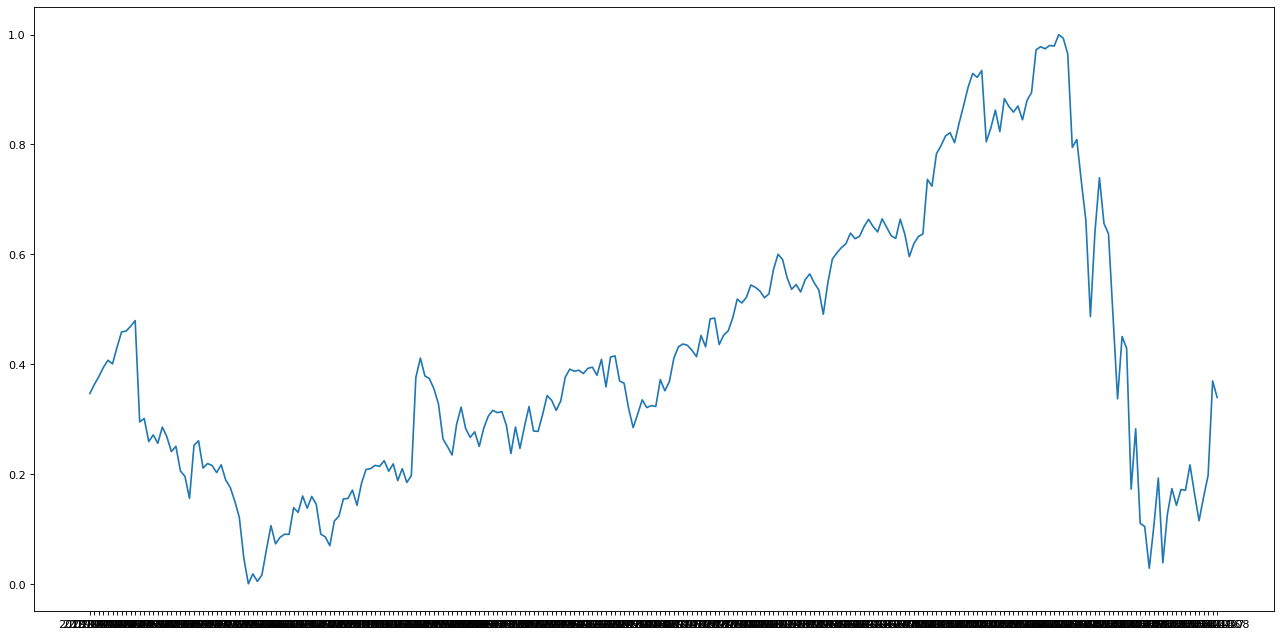

In [19]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 10), dpi= 80)
fig=plt.plot(e.y_)

In [20]:
#normal preprocessing
v.upload.retrieve_backup(e.K)

#dropping extra columns
e.X = e.X.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

#preprocessing
index = e.X.pop('Date')
scaler, e.X = v.partition.scale('all_df', scaler='MinMaxScaler', df=e.X, to_float=True, return_df=True)
e.X = e.X.set_index(index)
l.preprocessing.transform_to_stationary()
e.X = l.preprocessing.series_to_supervised(e.X, 3, 1, drop_col=False)

#X, y
v.extract.labels(['var1(t)'])

#train, test
X_train, X_test = l.preprocessing.split(0.1, e.X)
y_train, y_test = l.preprocessing.split(0.1, e.y) #sembra non servire a nulla
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(225, 3) (24, 3) (225, 1) (24, 1)


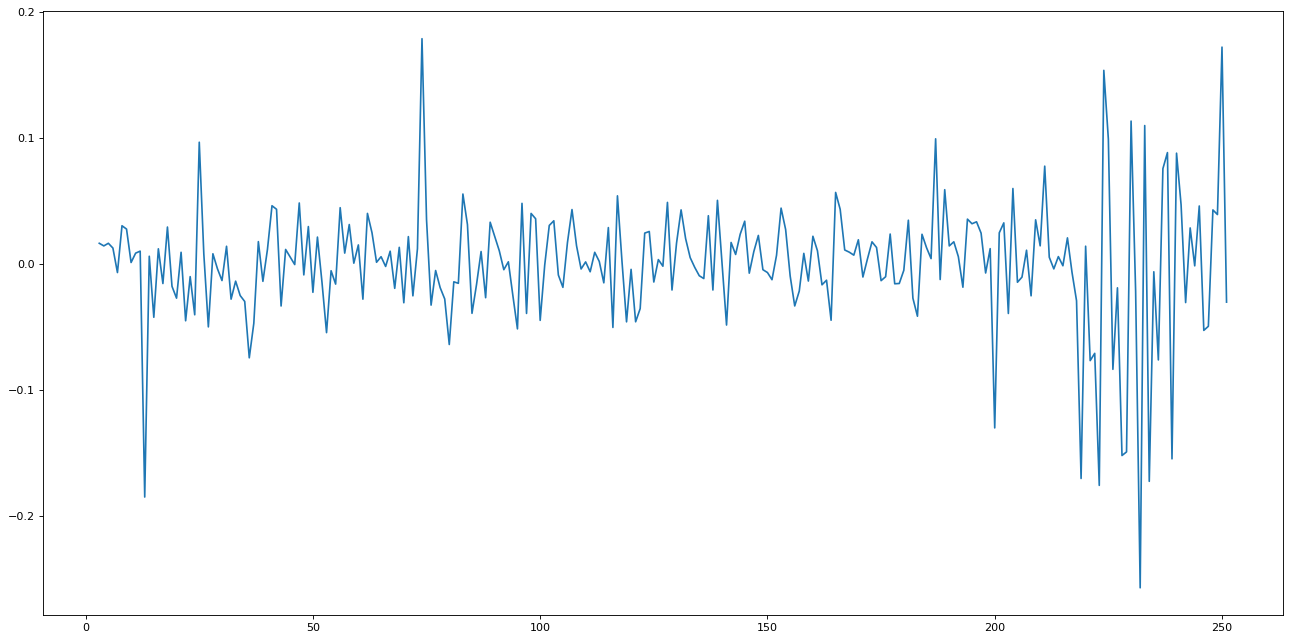

In [21]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 10), dpi= 80)
fig=plt.plot(e.y)

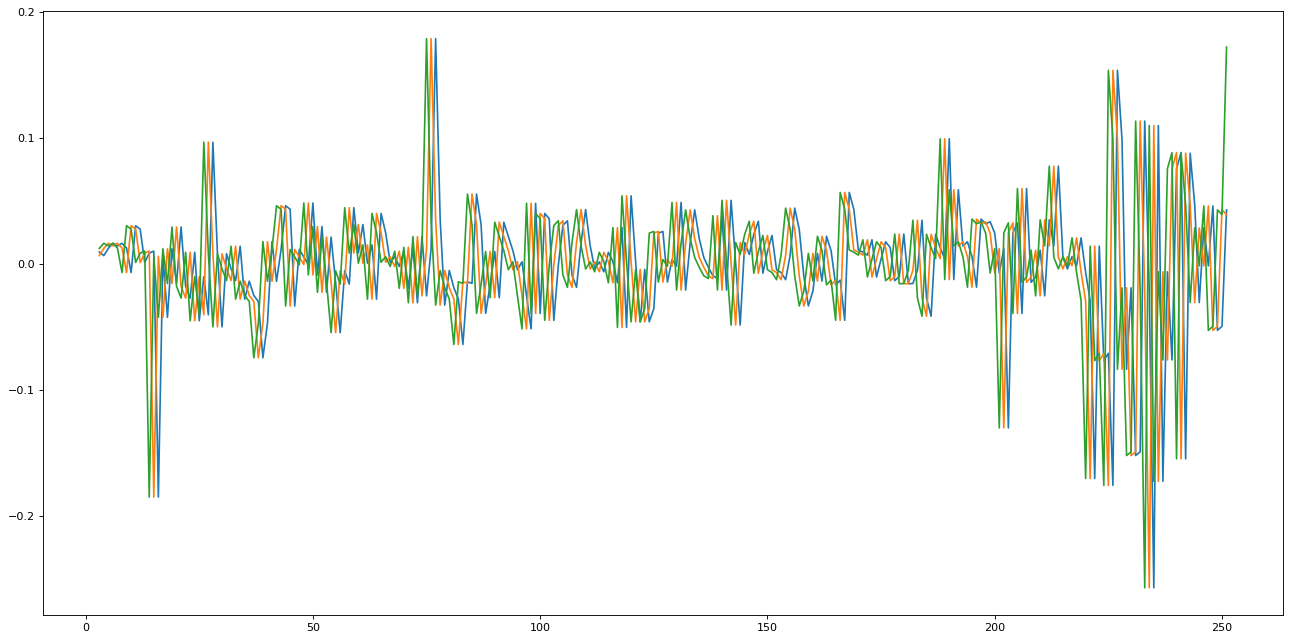

In [22]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 10), dpi= 80)
fig=plt.plot(e.X)

In [24]:
#reshape [samples, n_input_timesteps, n_features]
X_train = X_train.reshape((225, 3, 1))
y_train = y_train.reshape((225, 1, 1))
print(X_train.shape, y_train.shape)
#every sample has dimensions [1, 3, 1]

(225, 3, 1) (225, 1, 1)


In [25]:
#LSTM
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, batch_input_shape=(1, 3, 1), stateful=True)) #dimensions of every single sample
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=3000, batch_size=1, verbose=2, shuffle=False)
model.reset_states()

X_test = X_test.reshape(24, 3, 1)
y_test = y_test.reshape(24, 1, 1)
print(X_test.shape, y_test.shape)

Streaming output truncated to the last 5000 lines.
Epoch 500/3000
225/225 - 0s - loss: 0.0012
Epoch 501/3000
225/225 - 0s - loss: 0.0012
Epoch 502/3000
225/225 - 0s - loss: 0.0011
Epoch 503/3000
225/225 - 0s - loss: 0.0012
Epoch 504/3000
225/225 - 0s - loss: 0.0012
Epoch 505/3000
225/225 - 0s - loss: 0.0012
Epoch 506/3000
225/225 - 0s - loss: 0.0012
Epoch 507/3000
225/225 - 0s - loss: 0.0012
Epoch 508/3000
225/225 - 0s - loss: 0.0012
Epoch 509/3000
225/225 - 0s - loss: 0.0012
Epoch 510/3000
225/225 - 0s - loss: 0.0012
Epoch 511/3000
225/225 - 0s - loss: 0.0012
Epoch 512/3000
225/225 - 0s - loss: 0.0012
Epoch 513/3000
225/225 - 0s - loss: 0.0013
Epoch 514/3000
225/225 - 0s - loss: 0.0013
Epoch 515/3000
225/225 - 0s - loss: 0.0013
Epoch 516/3000
225/225 - 0s - loss: 0.0012
Epoch 517/3000
225/225 - 0s - loss: 0.0012
Epoch 518/3000
225/225 - 0s - loss: 0.0012
Epoch 519/3000
225/225 - 0s - loss: 0.0012
Epoch 520/3000
225/225 - 0s - loss: 0.0012
Epoch 521/3000
225/225 - 0s - loss: 0.0012
Epo

In [26]:
#make a one-step forecast
yhat = model.predict(X_test, verbose=2, batch_size=1)
#without batch_size the model only accepts one input at a time
yhat

24/24 - 0s


array([[-0.04696345],
       [ 0.03206931],
       [-0.18979315],
       [ 0.00682331],
       [ 0.02341432],
       [-0.16108331],
       [-0.00049329],
       [-0.145303  ],
       [-0.15979873],
       [-0.00961446],
       [ 0.02861861],
       [-0.05857746],
       [-0.01472849],
       [ 0.02434599],
       [-0.05536114],
       [ 0.00922018],
       [ 0.03102434],
       [-0.01390202],
       [ 0.00944739],
       [ 0.00411285],
       [ 0.03038205],
       [ 0.00657554],
       [ 0.04758127],
       [ 0.03749657]], dtype=float32)

In [28]:
#invert preprocessing on predicted data
#remove stationary
y_test = y_test.reshape(24, 1)
var1 = y_test_    #original values
var2 = yhat       #gaps
var3 = list()     #

#var1 = var1.values
#var2 = var2.values

var3.append(var1[0])
for i in range(0, len(var2)):
  values = var1[i] + var2[i]
  var3.append(values)
var3

#inverse scaling
predicted = scaler.inverse_transform(var3)
predicted

array([[1350.19995824],
       [1327.55559288],
       [1292.52292183],
       [1113.78744665],
       [1263.29001053],
       [1260.98966678],
       [1048.33041522],
       [1178.76211317],
       [1025.93923827],
       [1016.05989685],
       [1051.8741647 ],
       [1106.84906114],
       [1107.47572023],
       [1054.21830217],
       [1115.50891084],
       [1099.7765301 ],
       [1116.24576462],
       [1140.62901753],
       [1118.33690587],
       [1151.85535375],
       [1123.98306701],
       [1112.90936663],
       [1122.18549325],
       [1160.94223751],
       [1239.0796836 ]])

In [29]:
#invert preprocessing on expected data
#inverse scaling
expected = scaler.inverse_transform(y_test_)
expected

array([[1350.2  ],
       [1277.06 ],
       [1205.3  ],
       [1260.   ],
       [1249.7  ],
       [1126.   ],
       [1179.   ],
       [1096.   ],
       [1093.11 ],
       [1056.51 ],
       [1093.05 ],
       [1135.72 ],
       [1061.32 ],
       [1103.77 ],
       [1126.47 ],
       [1111.8  ],
       [1125.67 ],
       [1125.04 ],
       [1147.3  ],
       [1122.   ],
       [1098.26 ],
       [1119.015],
       [1138.   ],
       [1221.   ],
       [1206.5  ]], dtype=float32)

In [30]:
for i in range(len(y_test_)):
  print('iteration=%d, Predicted=%f, Expected=%f' % (i+1, predicted[i], expected[i]))

iteration=1, Predicted=1350.199958, Expected=1350.199951
iteration=2, Predicted=1327.555593, Expected=1277.060059
iteration=3, Predicted=1292.522922, Expected=1205.300049
iteration=4, Predicted=1113.787447, Expected=1260.000000
iteration=5, Predicted=1263.290011, Expected=1249.699951
iteration=6, Predicted=1260.989667, Expected=1126.000000
iteration=7, Predicted=1048.330415, Expected=1179.000000
iteration=8, Predicted=1178.762113, Expected=1096.000000
iteration=9, Predicted=1025.939238, Expected=1093.109985
iteration=10, Predicted=1016.059897, Expected=1056.510010
iteration=11, Predicted=1051.874165, Expected=1093.050049
iteration=12, Predicted=1106.849061, Expected=1135.719971
iteration=13, Predicted=1107.475720, Expected=1061.319946
iteration=14, Predicted=1054.218302, Expected=1103.770020
iteration=15, Predicted=1115.508911, Expected=1126.469971
iteration=16, Predicted=1099.776530, Expected=1111.800049
iteration=17, Predicted=1116.245765, Expected=1125.670044
iteration=18, Predicted

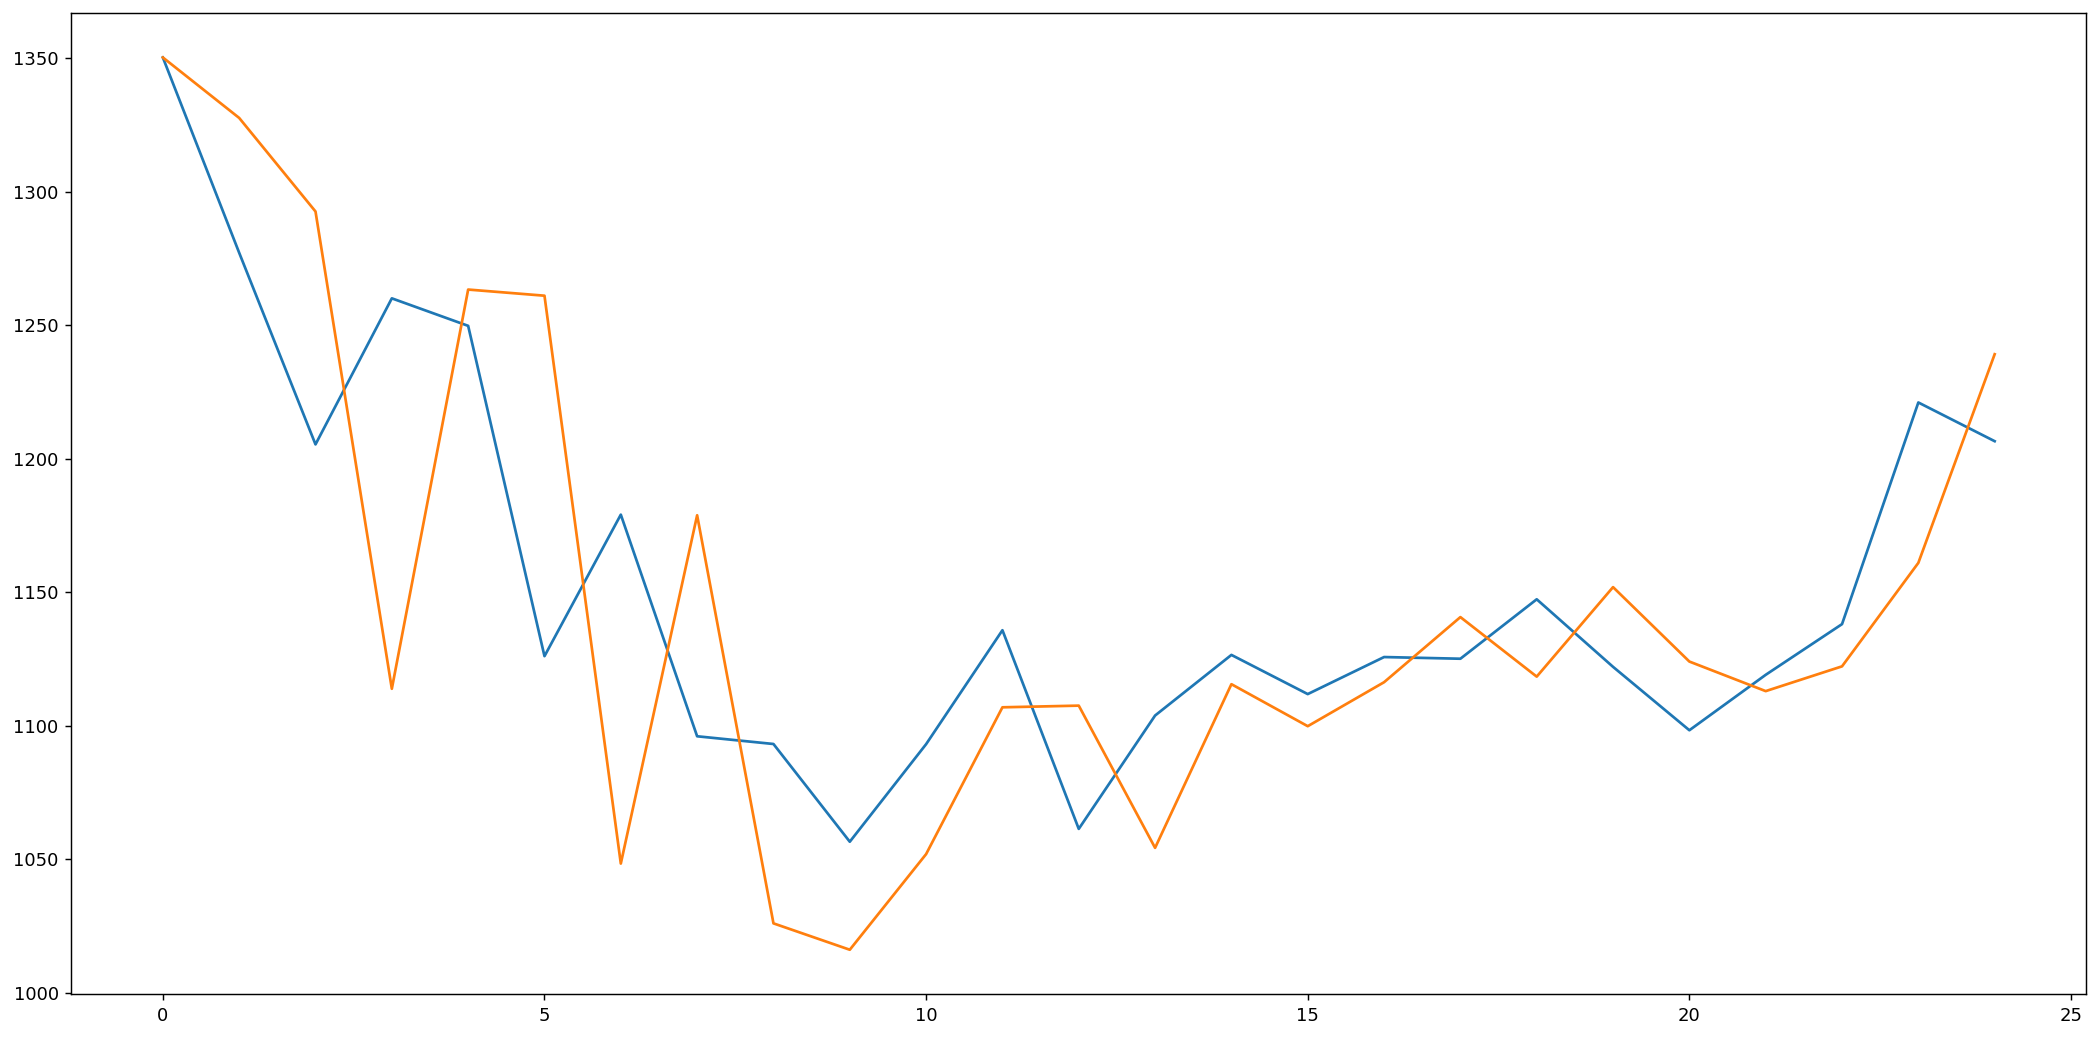

In [34]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 10), dpi= 130)
fig=plt.plot(expected)
fig=plt.plot(predicted)

In [13]:
# report performance
from math import *
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(expected, predicted))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted

Test RMSE: 58.232
